# Bank Credit Risk Project

### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing txt Data File

In [2]:
df=pd.read_csv("XYZCorp_LendingData.txt", sep="\t")

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\805807727.py:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("XYZCorp_LendingData.txt", sep="\t")


### Checking the shape and names of the columns along with info about the dataset

In [3]:
df.shape

(855969, 73)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Here, as we can see, some of the columns are not significant as they don't have any significance on dependent variable

In [6]:
df.drop(["id","member_id","zip_code","addr_state","policy_code","title","pymnt_plan","application_type","emp_title","emp_length","collections_12_mths_ex_med","total_rec_late_fee","recoveries","collection_recovery_fee","acc_now_delinq"],axis=1,inplace=True)

# Data Cleaning

### Remove NA's

In [7]:
# Variables having NA's
def get_na(data):
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        return null_vars
    else:
        print("No column have NA values")
get_na(df)

last_credit_pull_d                 50
revol_util                        446
last_pymnt_d                     8862
tot_coll_amt                    67313
tot_cur_bal                     67313
total_rev_hi_lim                67313
next_pymnt_d                   252971
mths_since_last_delinq         439812
mths_since_last_major_derog    642830
mths_since_last_record         724785
desc                           734159
open_acc_6m                    842681
open_il_12m                    842681
open_rv_24m                    842681
open_il_24m                    842681
open_il_6m                     842681
total_cu_tl                    842681
inq_last_12m                   842681
inq_fi                         842681
total_bal_il                   842681
max_bal_bc                     842681
all_util                       842681
open_rv_12m                    842681
mths_since_rcnt_il             843035
il_util                        844360
annual_inc_joint               855527
verification

### Drop columns with more than 90% NA's

In [8]:
df.drop(["dti_joint","verification_status_joint","annual_inc_joint","il_util","mths_since_rcnt_il","open_rv_12m","all_util","max_bal_bc","total_bal_il","inq_fi","inq_last_12m","total_cu_tl","open_il_6m","open_il_24m","open_rv_24m","open_il_12m","open_acc_6m","desc"],axis=1,inplace=True)

In [9]:
get_na(df)

last_credit_pull_d                 50
revol_util                        446
last_pymnt_d                     8862
tot_coll_amt                    67313
total_rev_hi_lim                67313
tot_cur_bal                     67313
next_pymnt_d                   252971
mths_since_last_delinq         439812
mths_since_last_major_derog    642830
mths_since_last_record         724785
dtype: int64

### Fill NA's in numerical and categorical columns by mean and mode respectively

In [10]:
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0])
df['last_pymnt_d']=df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])
df['next_pymnt_d']=df['next_pymnt_d'].fillna(df['next_pymnt_d'].mode()[0])
df['mths_since_last_delinq']=df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mode()[0])
df['mths_since_last_major_derog']=df['mths_since_last_major_derog'].fillna(df['mths_since_last_major_derog'].mode()[0])
df['mths_since_last_record']=df['mths_since_last_record'].fillna(df['mths_since_last_record'].mode()[0])

In [11]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mean())
df['tot_coll_amt']=df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean())
df['tot_cur_bal']=df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean())
df['total_rev_hi_lim']=df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mean())

In [12]:
get_na(df)

No column have NA values


### Change dates to date type and extract month and year

In [13]:
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])
df["last_pymnt_d"]=pd.to_datetime(df["last_pymnt_d"])
df["next_pymnt_d"]=pd.to_datetime(df["next_pymnt_d"])
df["last_credit_pull_d"]=pd.to_datetime(df["last_credit_pull_d"])
df["issue_d"]=pd.to_datetime(df["issue_d"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\1836837618.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])
C:\Users\vs\AppData\Local\Temp\ipykernel_2832\1836837618.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["last_pymnt_d"]=pd.to_datetime(df["last_pymnt_d"])
C:\Users\vs\AppData\Local\Temp\ipykernel_2832\1836837618.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["next_pymnt_d"]=pd.to_datetime(df["next_pymnt_d"])
C:\Users\vs\AppData\Local\Temp\ipykernel_2832\1836837618.py:4: UserWarning: Could n

In [14]:
df.next_pymnt_d.value_counts()

next_pymnt_d
2016-02-01    787065
2016-01-01     68838
2016-03-01        66
Name: count, dtype: int64

In [15]:
df.drop(["next_pymnt_d"],axis=1,inplace=True)

In [16]:
df["earliest_cr_line_month"]=df['earliest_cr_line'].map(lambda x: x.month)
df["earliest_cr_line_year"]=df['earliest_cr_line'].map(lambda x: x.year)

In [17]:
df["last_pymnt_d_month"]=df['last_pymnt_d'].map(lambda x: x.month)
df["last_pymnt_d_year"]=df['last_pymnt_d'].map(lambda x: x.year)

In [18]:
df["last_credit_pull_d_month"]=df['last_credit_pull_d'].map(lambda x: x.month)
df["last_credit_pull_d_year"]=df['last_credit_pull_d'].map(lambda x: x.year)

In [19]:
df.drop(["earliest_cr_line","last_pymnt_d","last_credit_pull_d"],axis=1,inplace=True)

In [20]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,225.412882,139766.247529,32163.574526,0,1,1985,1,2015,1,2016
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,225.412882,139766.247529,32163.574526,1,4,1999,4,2013,9,2013
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,225.412882,139766.247529,32163.574526,0,11,2001,6,2014,1,2016
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,225.412882,139766.247529,32163.574526,0,2,1996,1,2015,1,2015
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,225.412882,139766.247529,32163.574526,0,1,1996,1,2016,1,2016


# EDA

### Categorical Attributes

<Axes: xlabel='count', ylabel='term'>

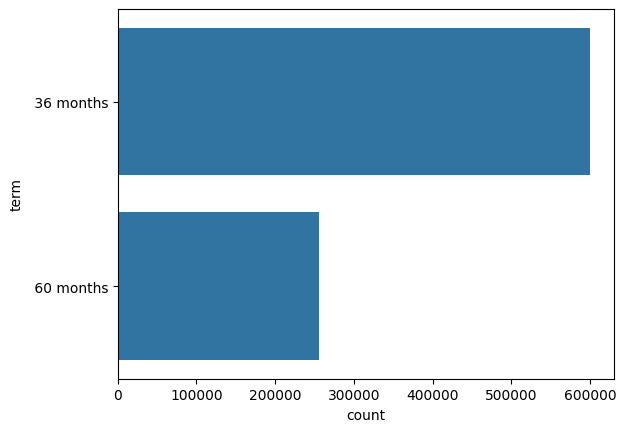

In [21]:
sns.countplot(df["term"])

<Axes: xlabel='count', ylabel='grade'>

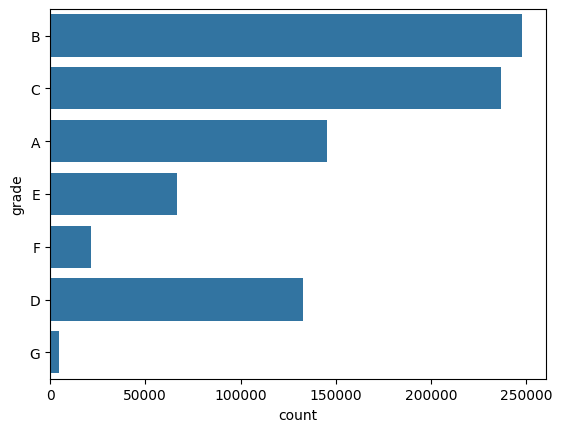

In [22]:
sns.countplot(df["grade"])

<Axes: xlabel='count', ylabel='sub_grade'>

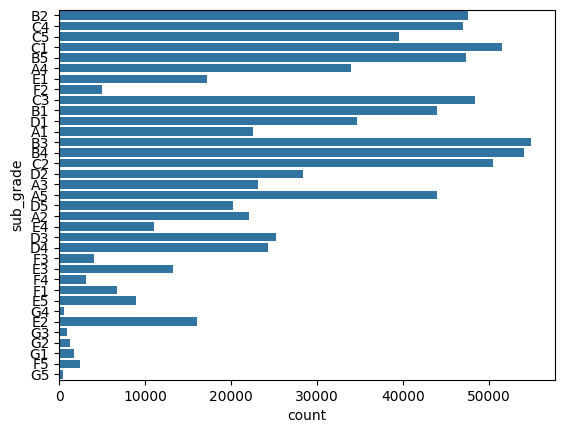

In [23]:
sns.countplot(df["sub_grade"])

<Axes: xlabel='count', ylabel='home_ownership'>

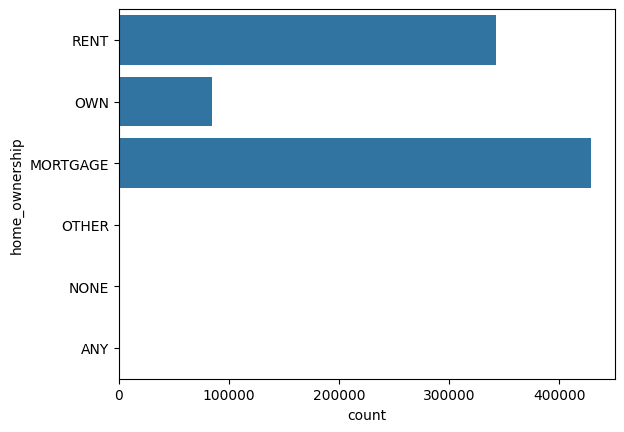

In [24]:
sns.countplot(df["home_ownership"])

<Axes: xlabel='count', ylabel='verification_status'>

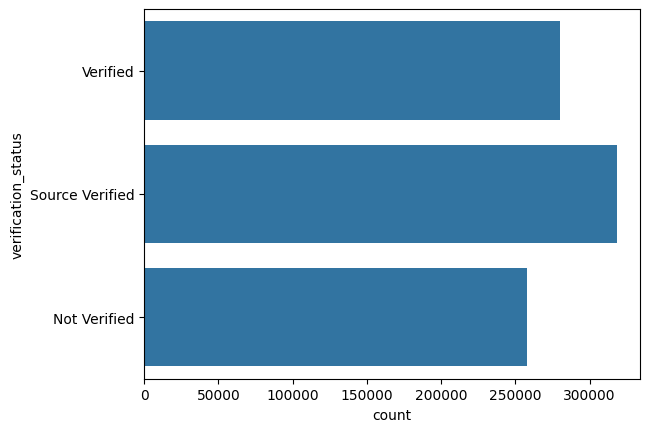

In [25]:
sns.countplot(df["verification_status"])

<Axes: xlabel='count', ylabel='purpose'>

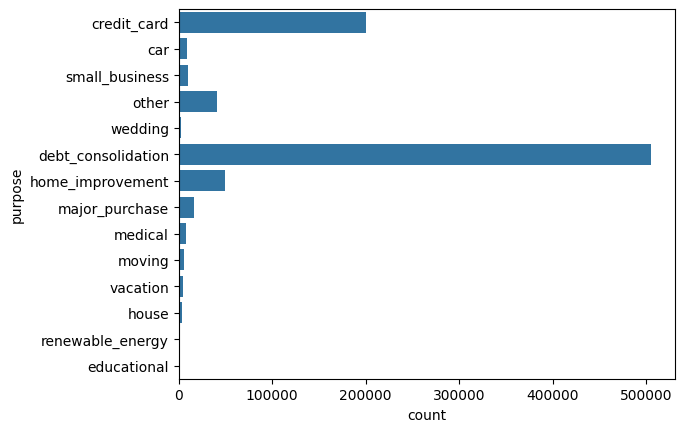

In [26]:
sns.countplot(df["purpose"])

<Axes: xlabel='count', ylabel='initial_list_status'>

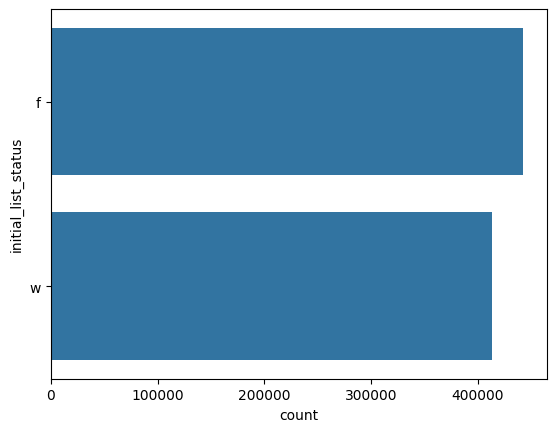

In [27]:
sns.countplot(df["initial_list_status"])

# Numerical Attributes

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\3720033395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["loan_amnt"])


<Axes: xlabel='loan_amnt', ylabel='Density'>

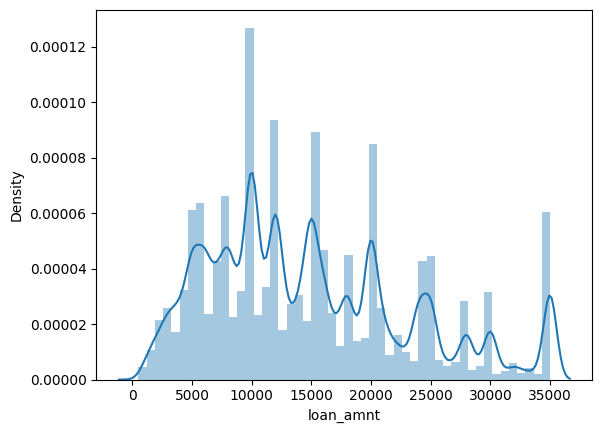

In [28]:
sns.distplot(df["loan_amnt"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\2162443209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["funded_amnt"])


<Axes: xlabel='funded_amnt', ylabel='Density'>

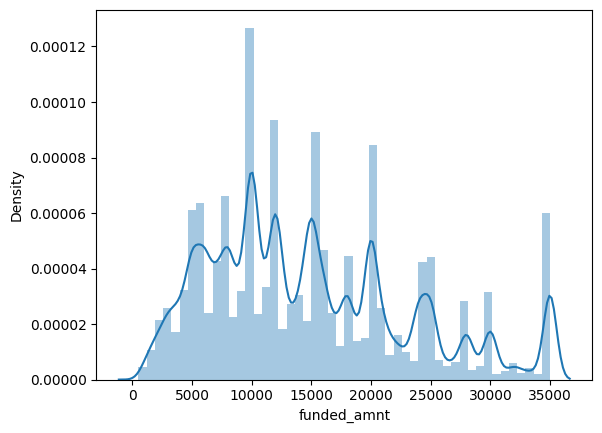

In [29]:
sns.distplot(df["funded_amnt"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\4050685761.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_amount,ax=ax[0],color="#000000")
C:\Users\vs\AppData\Local\Temp\ipykernel_2832\4050685761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(funded_amount,ax=ax[1])


Text(0.5, 1.0, 'Amount funded by the Borrower')

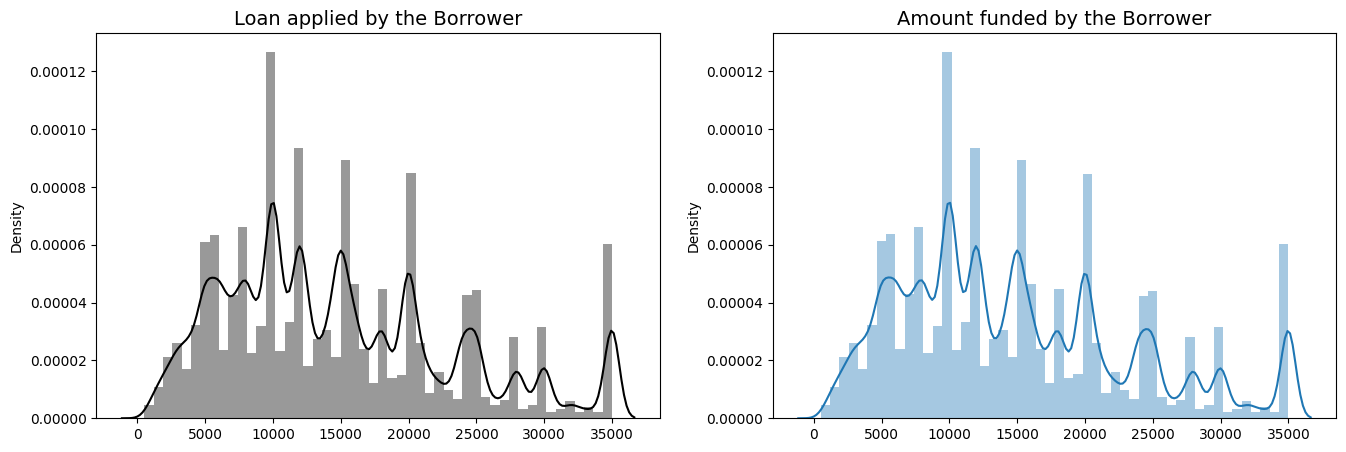

In [30]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
# Making a plot with two subplots
loan_amount=df["loan_amnt"].values
funded_amount=df["funded_amnt"].values
sns.distplot(loan_amount,ax=ax[0],color="#000000")
ax[0].set_title("Loan applied by the Borrower", fontsize=14)
sns.distplot(funded_amount,ax=ax[1])
ax[1].set_title("Amount funded by the Borrower", fontsize=14)

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\2520594829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["funded_amnt_inv"])


<Axes: xlabel='funded_amnt_inv', ylabel='Density'>

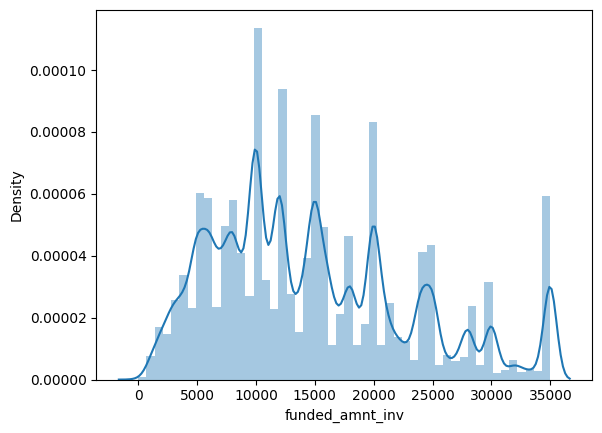

In [31]:
sns.distplot(df["funded_amnt_inv"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\576339031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["int_rate"])


<Axes: xlabel='int_rate', ylabel='Density'>

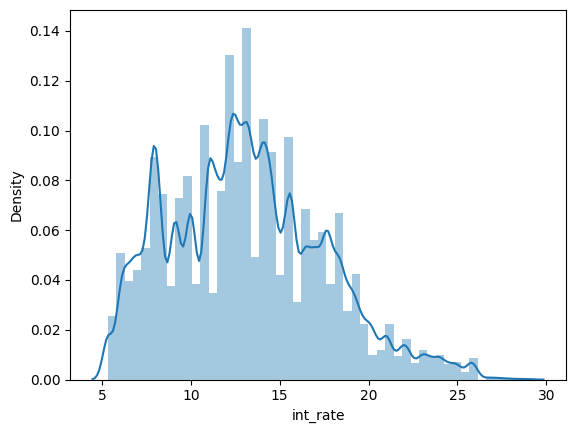

In [32]:
sns.distplot(df["int_rate"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\3206694565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["installment"])


<Axes: xlabel='installment', ylabel='Density'>

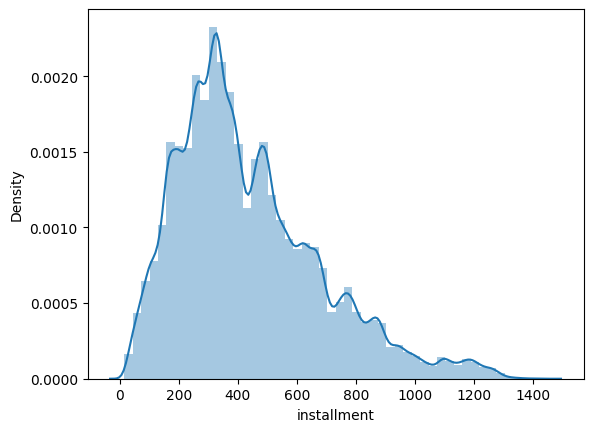

In [33]:
sns.distplot(df["installment"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\3761385195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["annual_inc"])


<Axes: xlabel='annual_inc', ylabel='Density'>

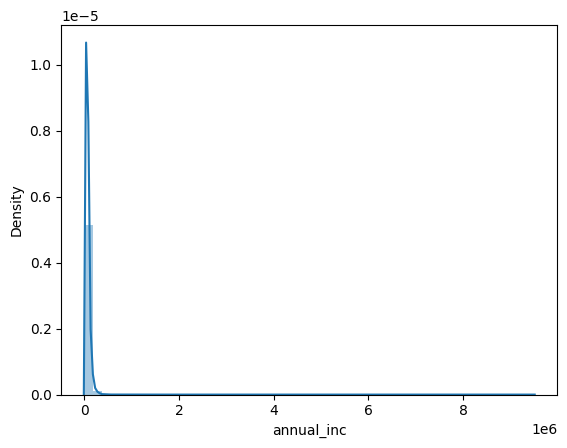

In [34]:
sns.distplot(df["annual_inc"])

### Upper Capping and Lower Capping for Numerical Features

In [35]:
def set_capping(column,capping):
    mean=df[column].mean()
    std=df[column].std()
    UCL=mean + (3*std)
    LCL=mean - (3*std)
    if capping=="both":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    elif capping=="upper":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
    elif capping=="lower":
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values: \tboth\tupper\tlower")

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\2811715011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["annual_inc"])


<Axes: xlabel='annual_inc', ylabel='Density'>

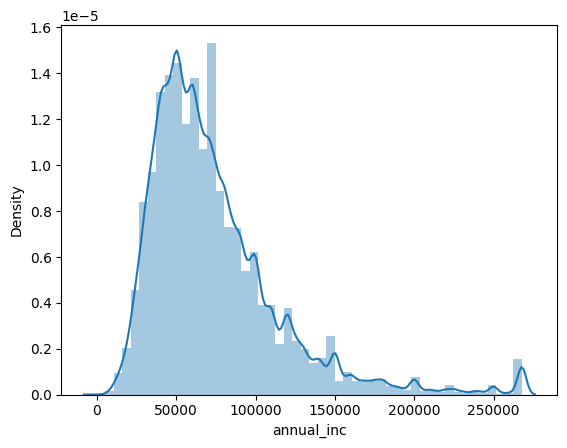

In [36]:
set_capping("annual_inc",capping="upper")
sns.distplot(df["annual_inc"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\2299896116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["dti"])


<Axes: xlabel='dti', ylabel='Density'>

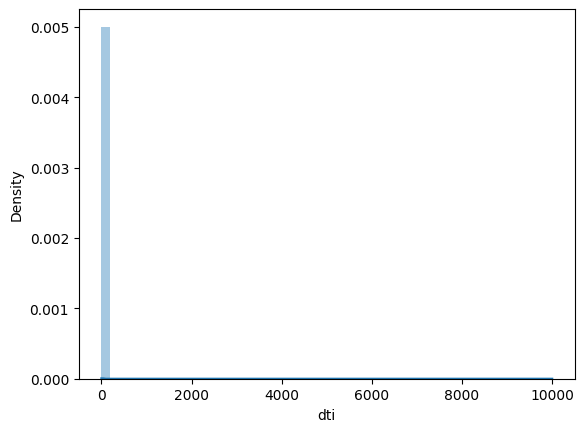

In [37]:
sns.distplot(df["dti"])

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\3359294928.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["dti"])


<Axes: xlabel='dti', ylabel='Density'>

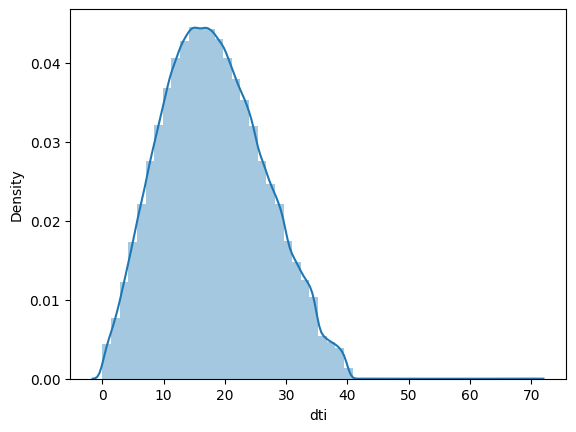

In [38]:
set_capping("dti",capping="upper")
sns.distplot(df["dti"])

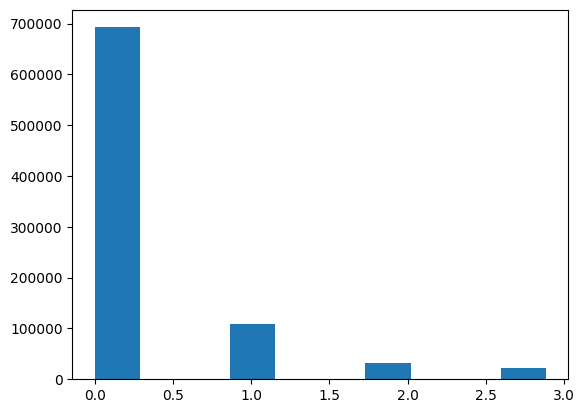

In [39]:
set_capping("delinq_2yrs",capping="upper")
plt.hist(df["delinq_2yrs"])
plt.show()

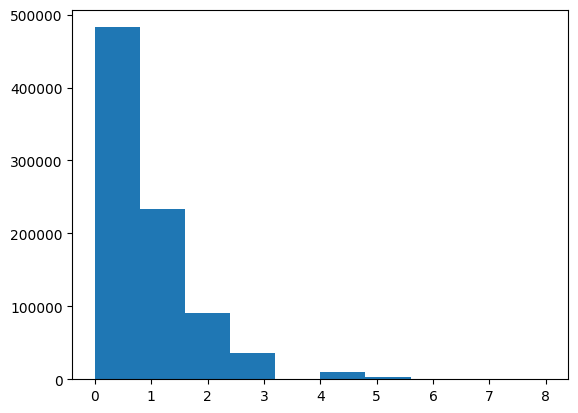

In [40]:
plt.hist(df["inq_last_6mths"])
plt.show()

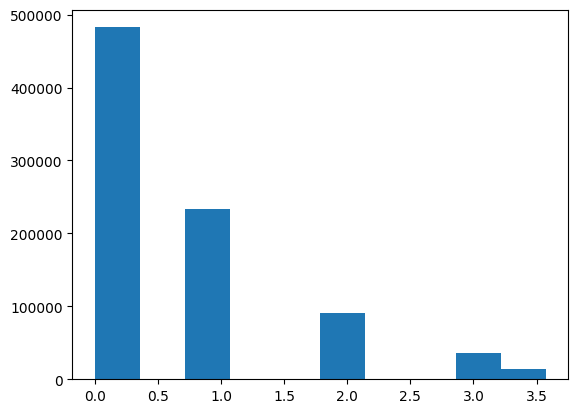

In [41]:
set_capping("inq_last_6mths",capping="upper")
plt.hist(df["inq_last_6mths"])
plt.show()

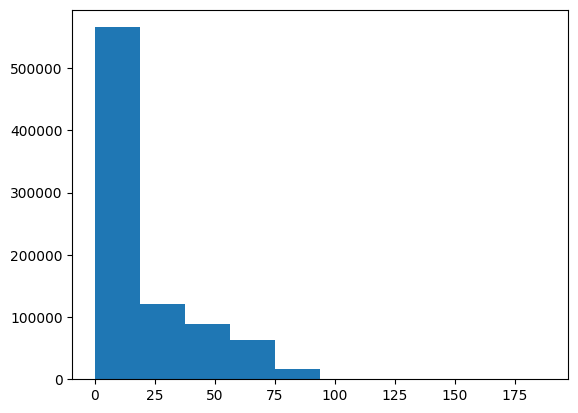

In [42]:
plt.hist(df["mths_since_last_delinq"])
plt.show()

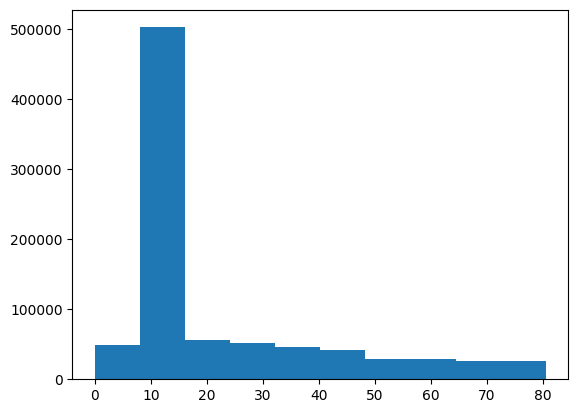

In [43]:
set_capping("mths_since_last_delinq",capping="upper")
plt.hist(df["mths_since_last_delinq"])
plt.show()

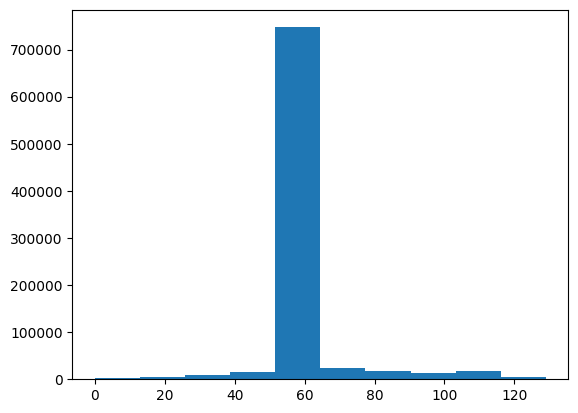

In [44]:
plt.hist(df["mths_since_last_record"])
plt.show()

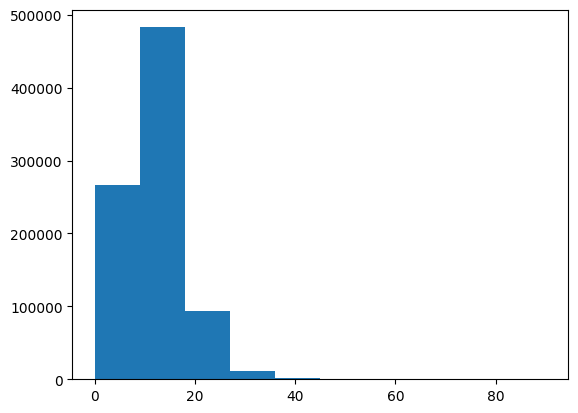

In [45]:
plt.hist(df["open_acc"])
plt.show()

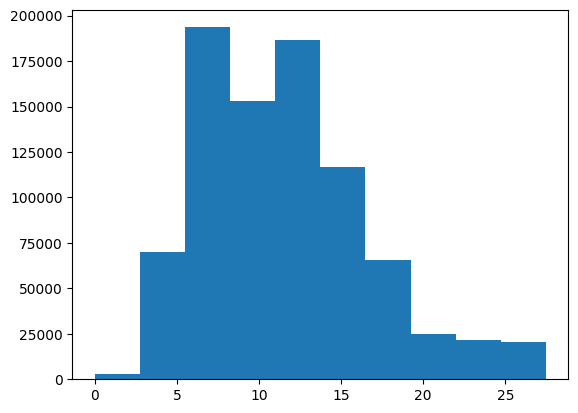

In [46]:
set_capping("open_acc",capping="upper")
plt.hist(df["open_acc"])
plt.show()

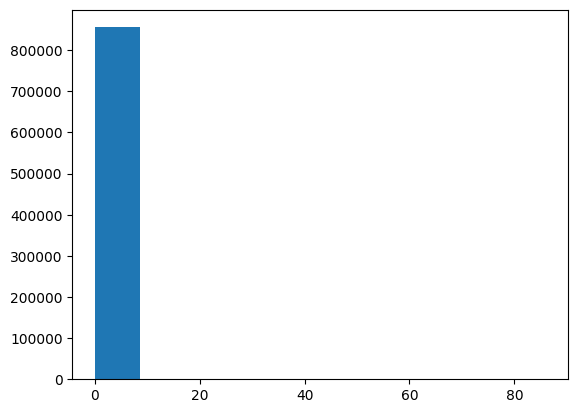

In [47]:
plt.hist(df["pub_rec"])
plt.show()

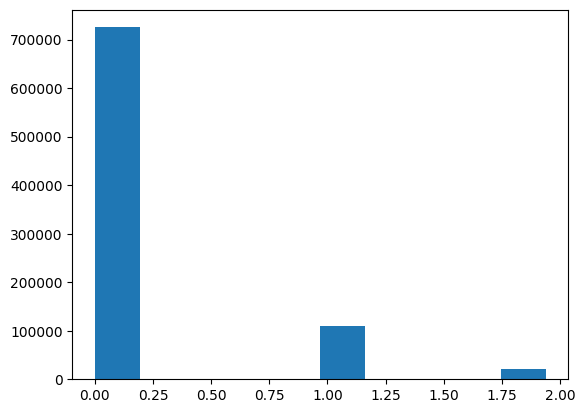

In [48]:
set_capping("pub_rec",capping="upper")
plt.hist(df["pub_rec"])
plt.show()

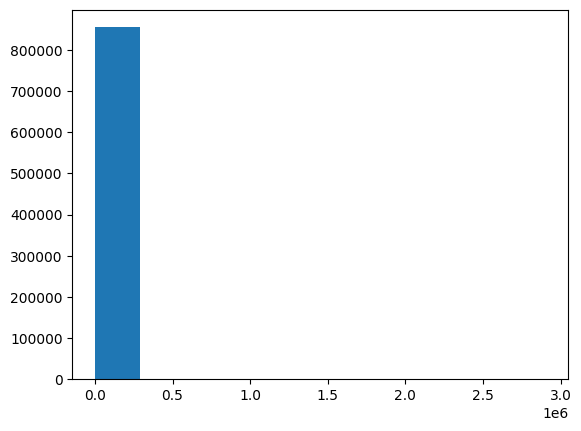

In [49]:
plt.hist(df["revol_bal"])
plt.show()

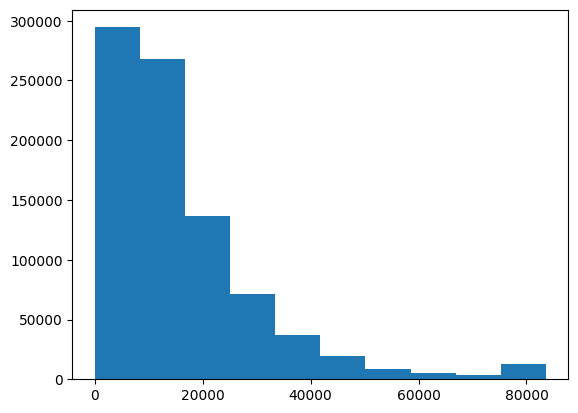

In [50]:
set_capping("revol_bal",capping="upper")
plt.hist(df["revol_bal"])
plt.show()

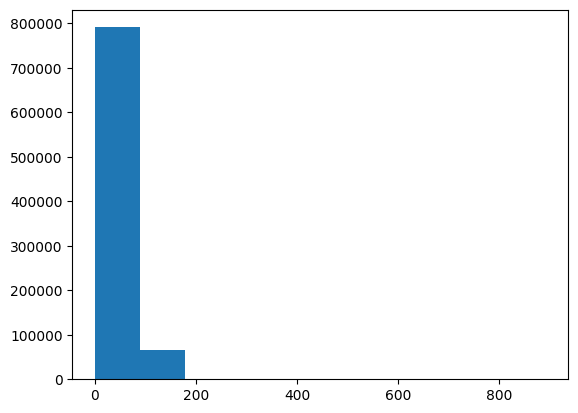

In [51]:
plt.hist(df["revol_util"])
plt.show()

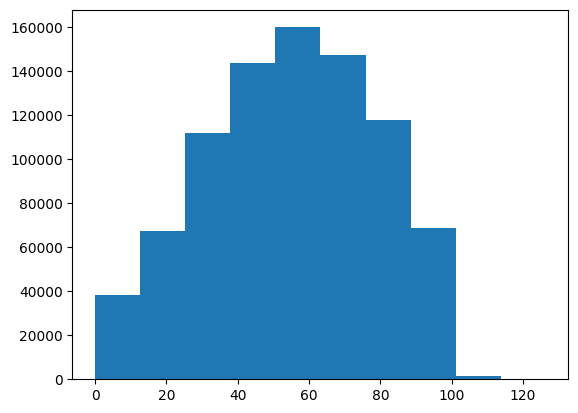

In [52]:
set_capping("revol_util",capping="upper")
plt.hist(df["revol_util"])
plt.show()

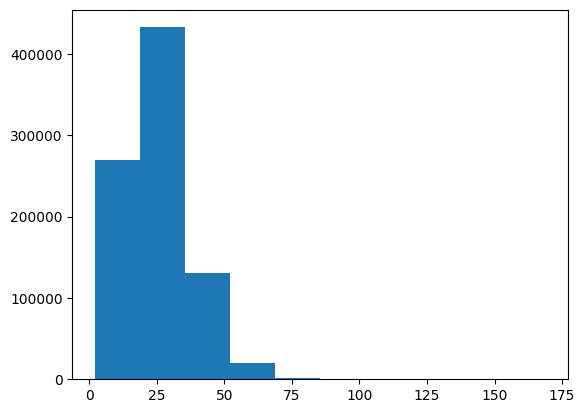

In [53]:
plt.hist(df["total_acc"])
plt.show()

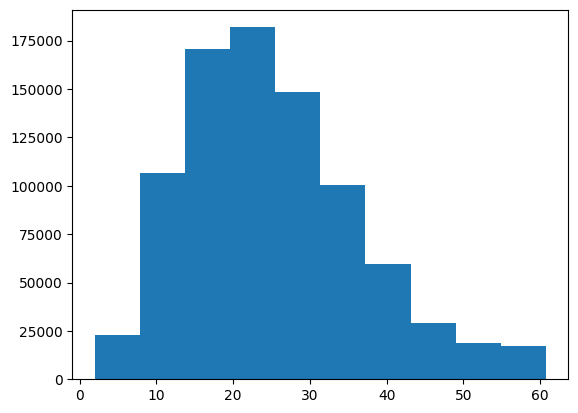

In [54]:
set_capping("total_acc",capping="upper")
plt.hist(df["total_acc"])
plt.show()

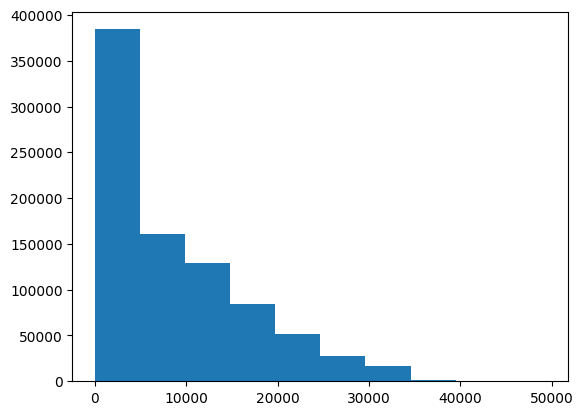

In [55]:
plt.hist(df["out_prncp"])
plt.show()

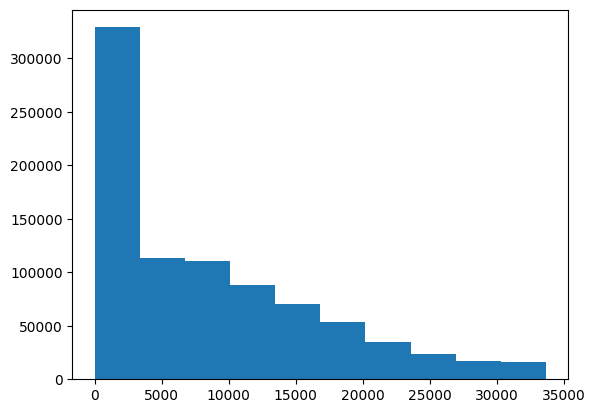

In [56]:
set_capping("out_prncp",capping="upper")
plt.hist(df["out_prncp"])
plt.show()

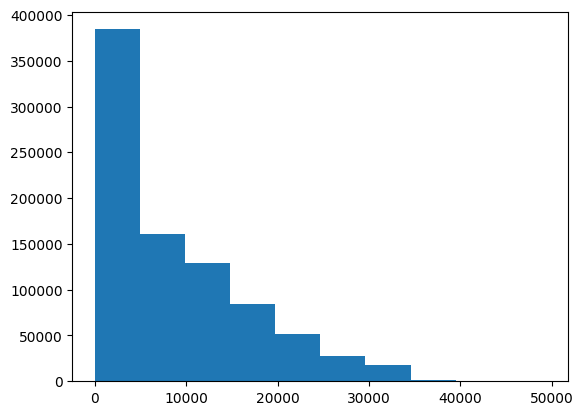

In [57]:
plt.hist(df["out_prncp_inv"])
plt.show()

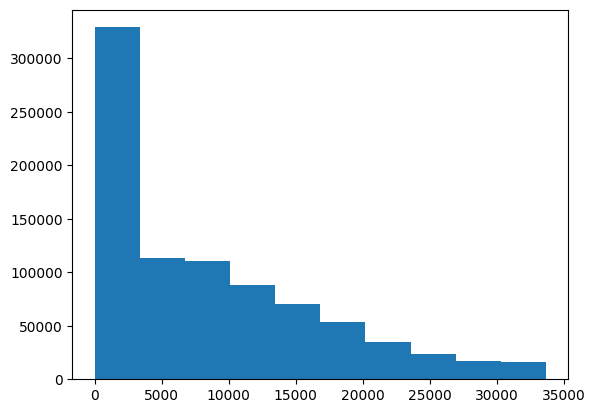

In [58]:
set_capping("out_prncp_inv",capping="upper")
plt.hist(df["out_prncp_inv"])
plt.show()

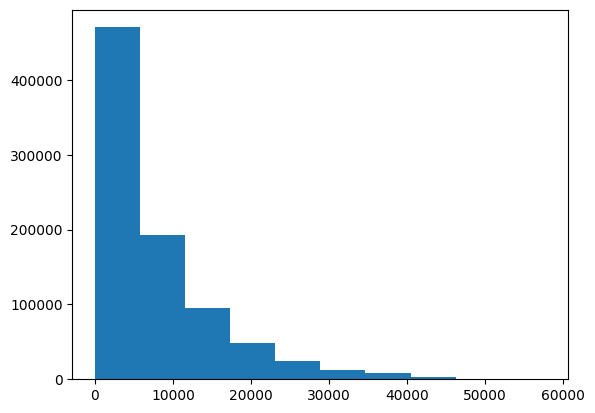

In [59]:
plt.hist(df["total_pymnt"])
plt.show()

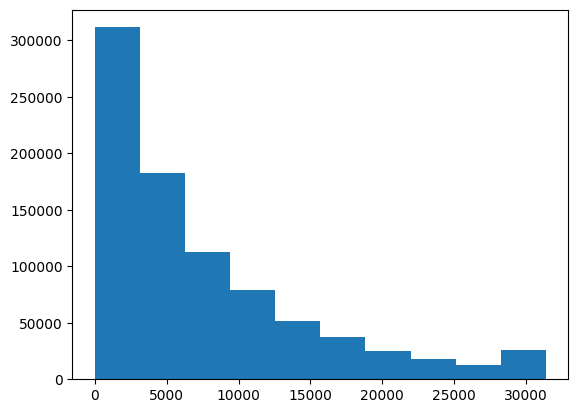

In [60]:
set_capping("total_pymnt",capping="upper")
plt.hist(df["total_pymnt"])
plt.show()

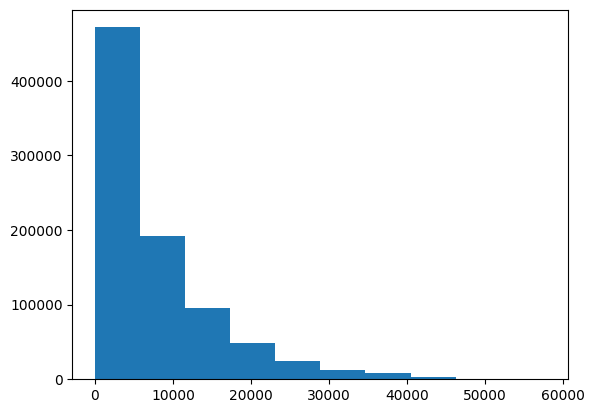

In [61]:
plt.hist(df["total_pymnt_inv"])
plt.show()

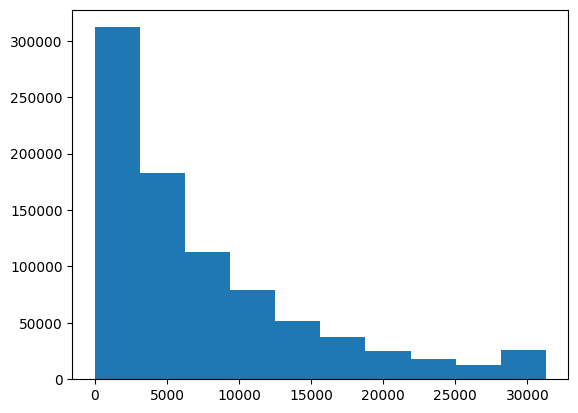

In [62]:
set_capping("total_pymnt_inv",capping="upper")
plt.hist(df["total_pymnt_inv"])
plt.show()

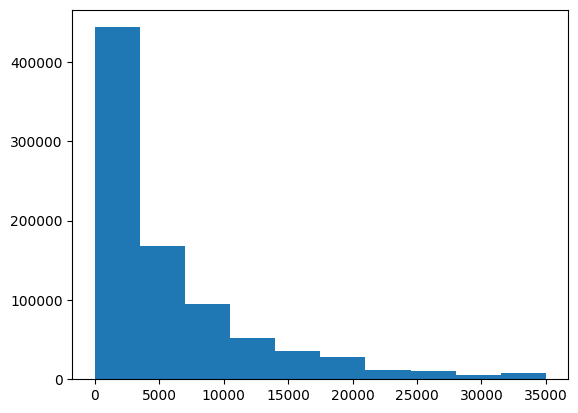

In [63]:
plt.hist(df["total_rec_prncp"])
plt.show()

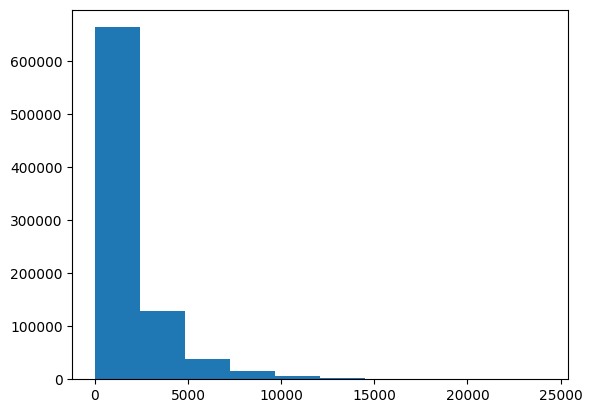

In [64]:
plt.hist(df["total_rec_int"])
plt.show()

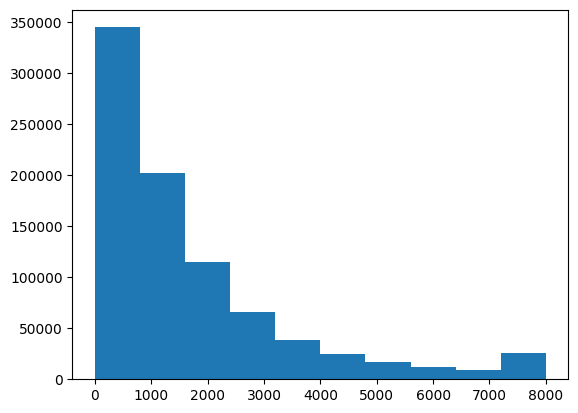

In [65]:
set_capping("total_rec_int",capping = "upper")
plt.hist(df["total_rec_int"])
plt.show()

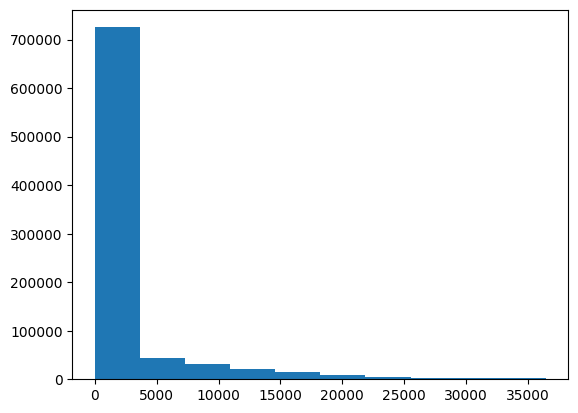

In [66]:
plt.hist(df["last_pymnt_amnt"])
plt.show()

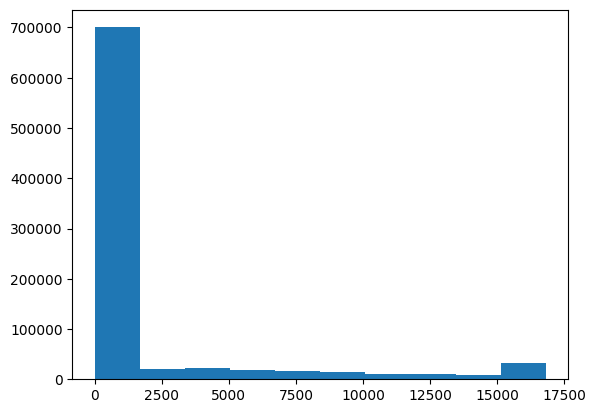

In [67]:
set_capping("last_pymnt_amnt",capping="upper")
plt.hist(df["last_pymnt_amnt"])
plt.show()

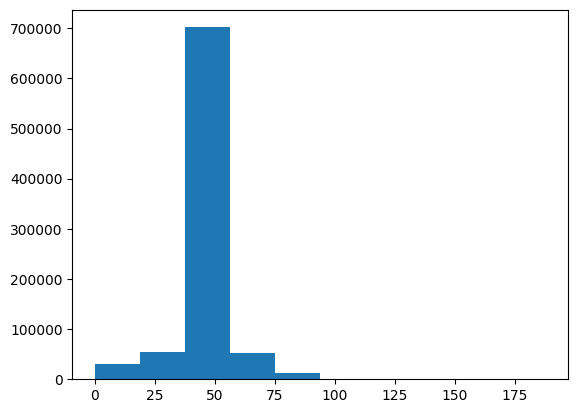

In [68]:
plt.hist(df["mths_since_last_major_derog"])
plt.show()

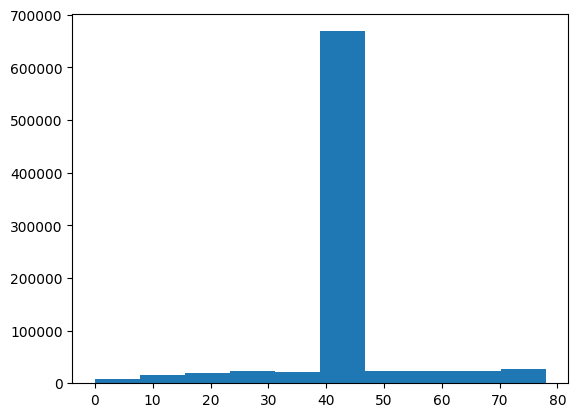

In [69]:
set_capping("mths_since_last_major_derog",capping="upper")
plt.hist(df["mths_since_last_major_derog"])
plt.show()

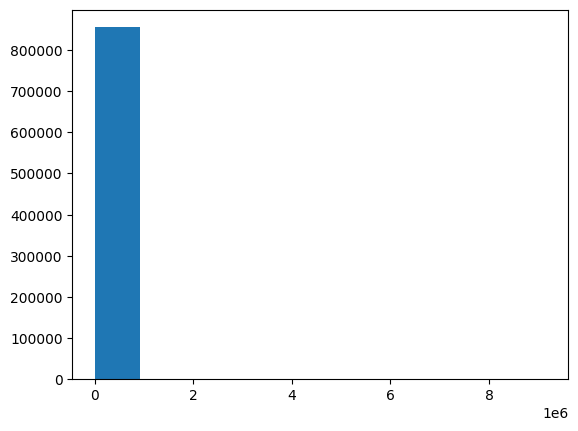

In [70]:
plt.hist(df["tot_coll_amt"])
plt.show()

In [71]:
# Upper Capping and Lower Capping for numerical Feature
def set_capping_n(column,capping):
    mean=df[column].mean()
    std=df[column].std()
    UCL=mean + (0.5 * std)
    LCL=mean - (0.5 * std)
    if capping=="both":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    elif capping=="upper":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
    elif capping=="lower":
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")
    

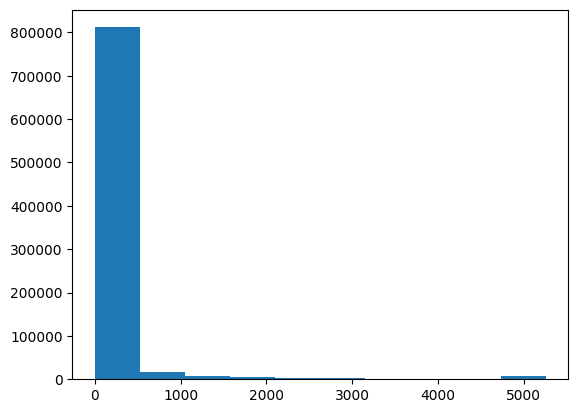

In [72]:
set_capping_n("tot_coll_amt",capping="upper")
plt.hist(df["tot_coll_amt"])
plt.show()

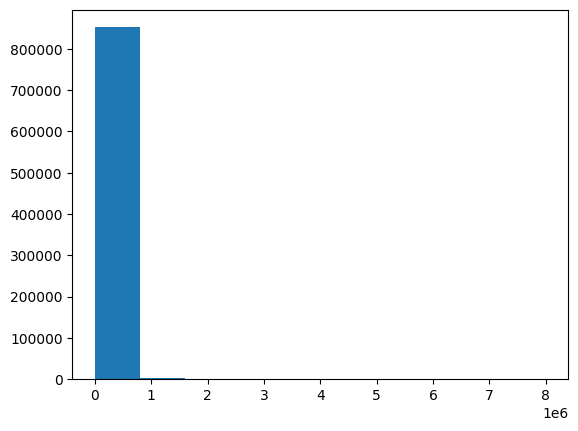

In [73]:
plt.hist(df["tot_cur_bal"])
plt.show()

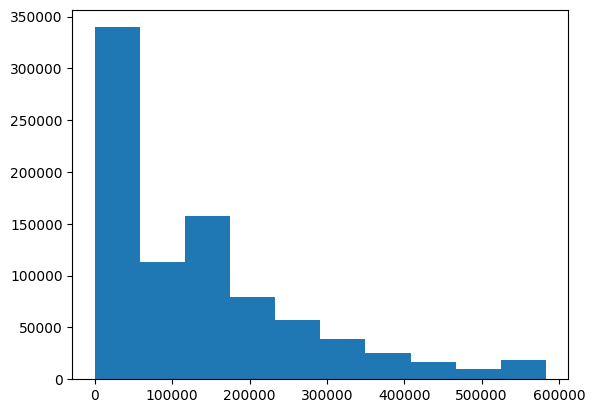

In [74]:
set_capping("tot_cur_bal",capping="upper")
plt.hist(df["tot_cur_bal"])
plt.show()

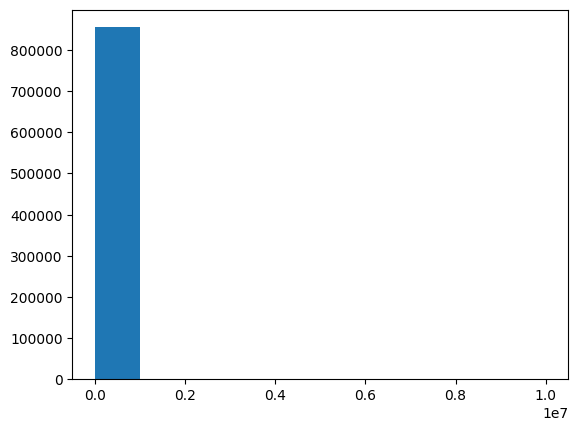

In [75]:
plt.hist(df["total_rev_hi_lim"])
plt.show()

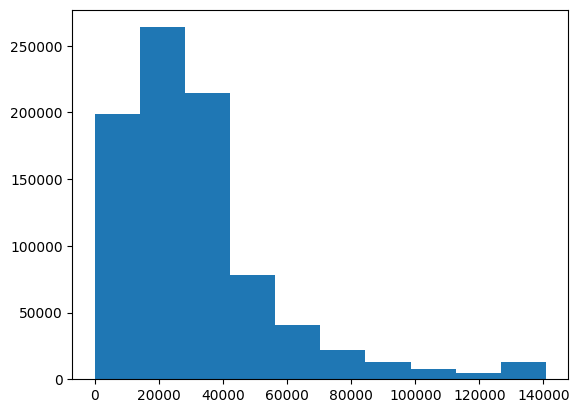

In [76]:
set_capping("total_rev_hi_lim",capping="upper")
plt.hist(df["total_rev_hi_lim"])
plt.show()

# Correlation Matrix

<Axes: >

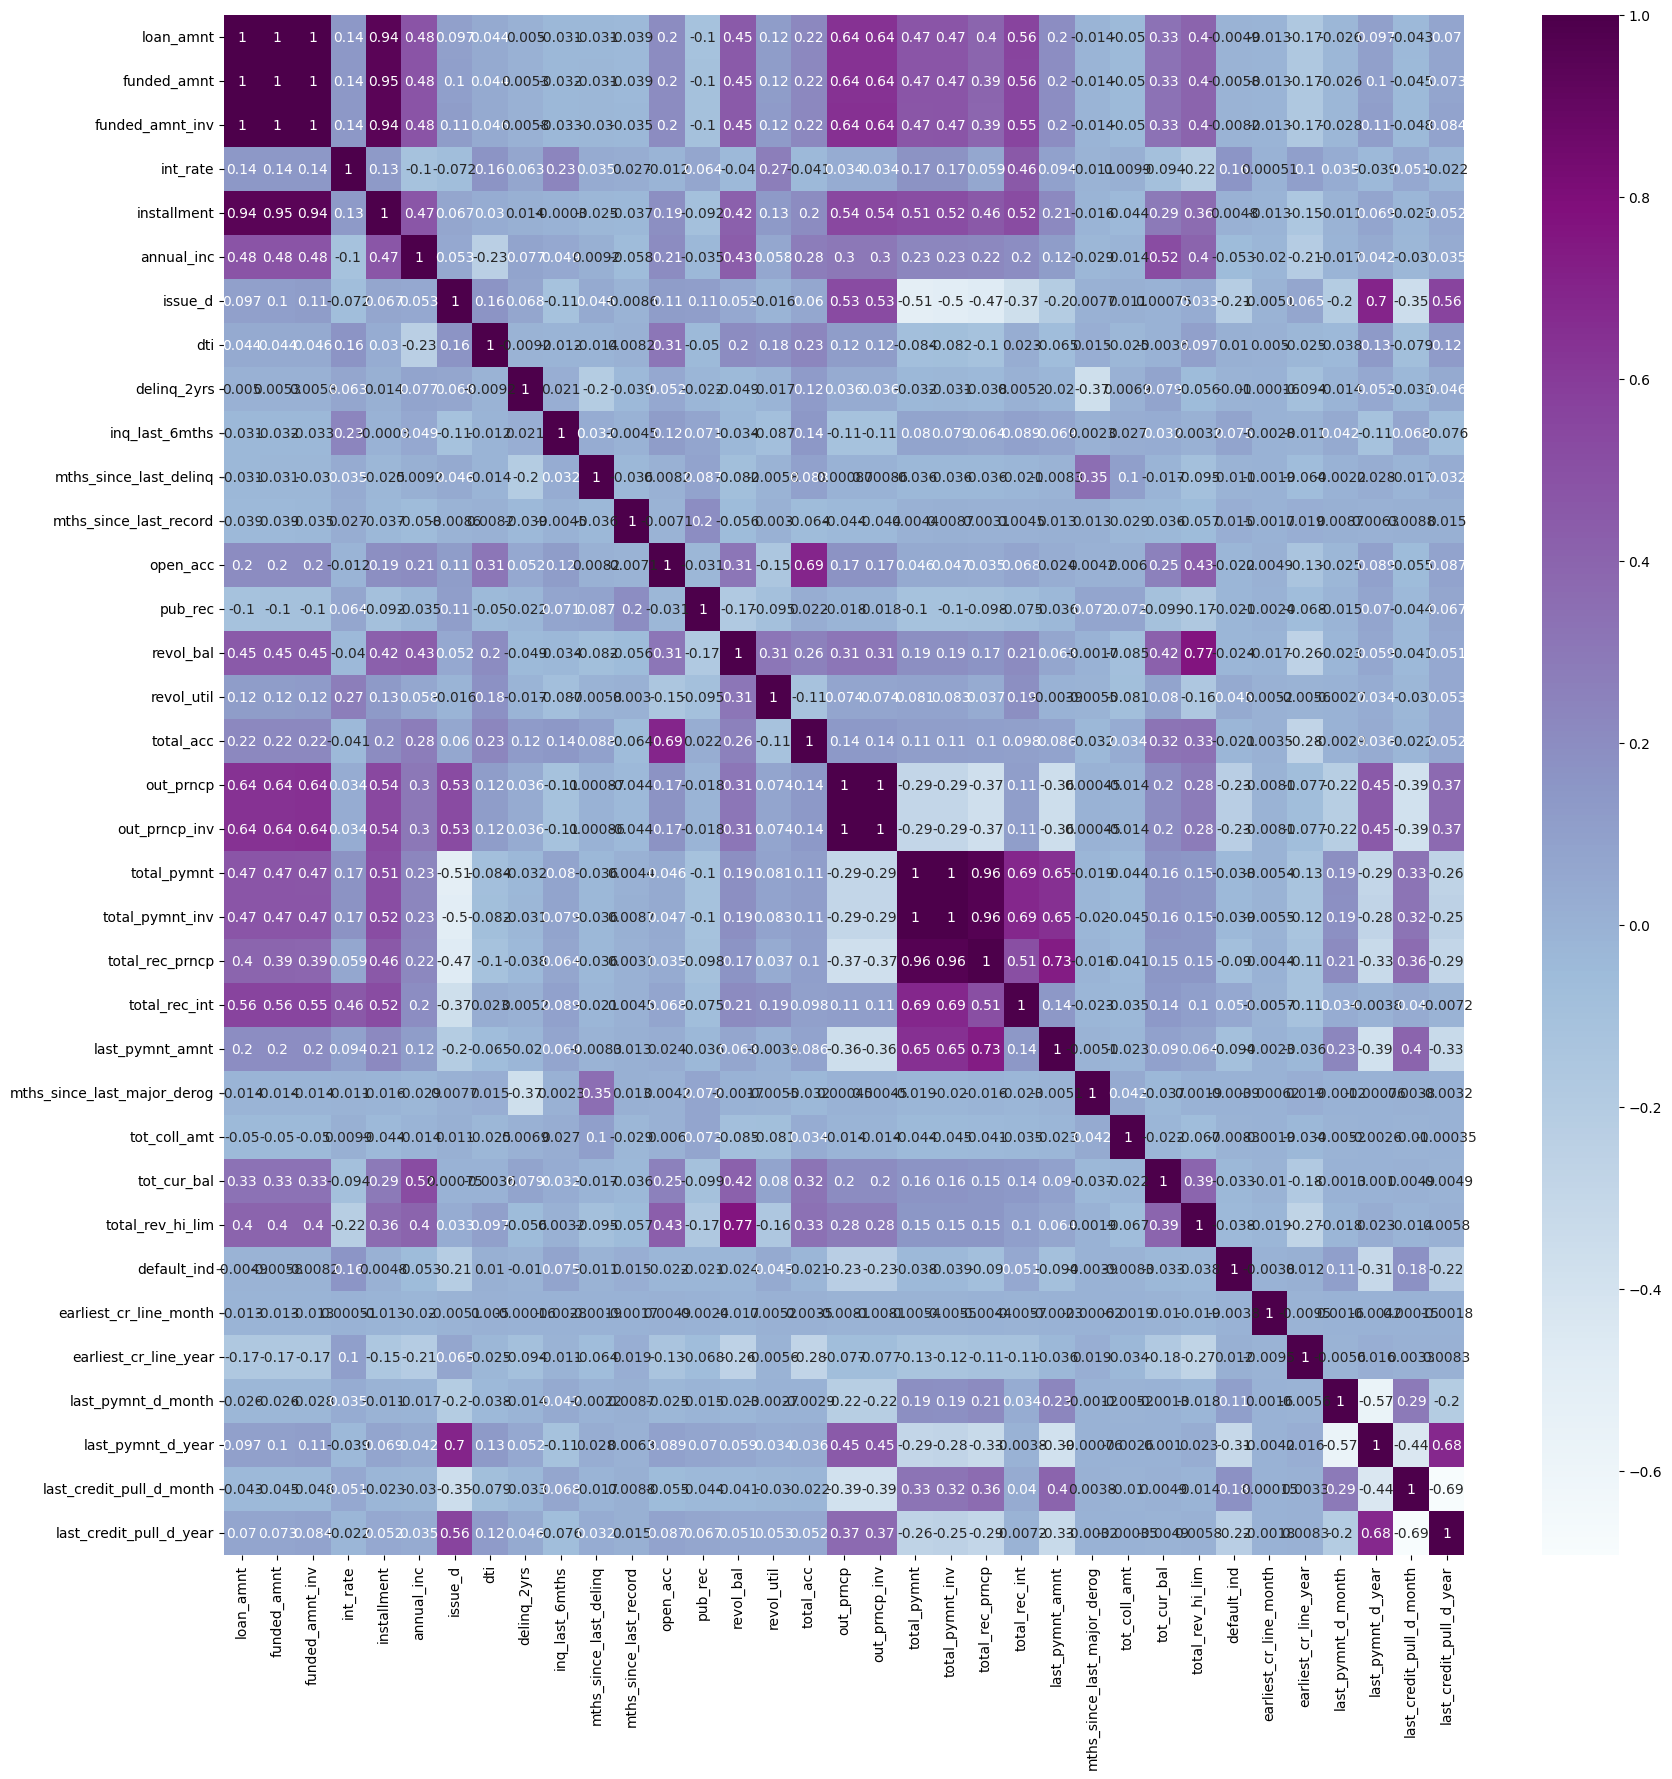

In [77]:
corr=df.drop(["term","grade","sub_grade","home_ownership","verification_status","purpose","initial_list_status"],axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [78]:
# Check vif

In [79]:
dat=df[["loan_amnt","funded_amnt","funded_amnt_inv","installment","out_prncp_inv","out_prncp",
         "total_pymnt_inv","total_pymnt","total_rec_prncp"]]

In [80]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
vif_data=pd.DataFrame()
vif_data["feature"]=dat.columns

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(dat.values,i)
                        for i in range(len(dat.columns))]
print(vif_data)

           feature            VIF
0        loan_amnt    2791.272595
1      funded_amnt   11613.931683
2  funded_amnt_inv    8709.867638
3      installment      42.432177
4    out_prncp_inv  375804.496819
5        out_prncp  375779.173087
6  total_pymnt_inv    3338.644282
7      total_pymnt    3380.589661
8  total_rec_prncp      30.354579


### Drop highly correlated variables

In [83]:
df.drop(["funded_amnt","funded_amnt_inv","out_prncp_inv","total_pymnt"],axis=1,inplace=True)

### Dummification of Categorical variables

In [84]:
cat_data=df.select_dtypes('O')
cat_data.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status'],
      dtype='object')

In [85]:
df=pd.get_dummies(data=df,columns=["term","grade","sub_grade","home_ownership","verification_status","purpose","initial_list_status"],drop_first=True)

In [86]:
df

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,5000.0,10.65,162.87,24000.0,2011-12-01,27.65,0.0,1.000000,9.0,61.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,30000.0,2011-12-01,1.00,0.0,3.573014,9.0,61.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,12252.0,2011-12-01,8.72,0.0,2.000000,9.0,61.0,...,False,False,False,False,False,False,True,False,False,False
3,10000.0,13.49,339.31,49200.0,2011-12-01,20.00,0.0,1.000000,35.0,61.0,...,False,False,False,False,True,False,False,False,False,False
4,3000.0,12.69,67.79,80000.0,2011-12-01,17.94,0.0,0.000000,38.0,61.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,11.99,332.10,31000.0,2015-01-01,28.69,0.0,0.000000,9.0,77.0,...,False,False,False,False,False,False,False,False,False,False
855965,24000.0,11.99,797.03,79000.0,2015-01-01,3.90,0.0,1.000000,26.0,61.0,...,False,False,False,False,False,False,False,False,False,False
855966,13000.0,15.99,316.07,35000.0,2015-01-01,30.90,0.0,0.000000,9.0,84.0,...,False,False,False,False,False,False,False,False,False,True
855967,12000.0,19.99,317.86,64400.0,2015-01-01,27.19,1.0,2.000000,22.0,61.0,...,False,False,False,False,False,False,False,False,False,True


In [87]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,5000.0,10.65,162.87,24000.0,2011-12-01,27.65,0.0,1.000000,9.0,61.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,30000.0,2011-12-01,1.00,0.0,3.573014,9.0,61.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,12252.0,2011-12-01,8.72,0.0,2.000000,9.0,61.0,...,False,False,False,False,False,False,True,False,False,False
3,10000.0,13.49,339.31,49200.0,2011-12-01,20.00,0.0,1.000000,35.0,61.0,...,False,False,False,False,True,False,False,False,False,False
4,3000.0,12.69,67.79,80000.0,2011-12-01,17.94,0.0,0.000000,38.0,61.0,...,False,False,False,False,True,False,False,False,False,False


# FEATURE ENGINEERING

### Sort the data on the basis of 'issue_d' date

In [88]:
df=df.sort_values("issue_d")

In [89]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
39693,7500.0,13.75,255.43,22000.0,2007-06-01,14.29,1.0,0.0,11.0,0.0,...,False,False,False,False,False,False,False,False,False,False
39671,5000.0,7.43,155.38,150000.0,2007-07-01,0.00,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
39659,5750.0,7.43,178.69,125000.0,2007-07-01,0.27,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
39660,5000.0,7.43,155.38,40000.0,2007-07-01,2.55,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
39666,1200.0,11.54,39.60,20000.0,2007-07-01,2.04,0.0,2.0,24.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
print("Initial Date:",df["issue_d"].min())
print("End Date",df["issue_d"].max())

Initial Date: 2007-06-01 00:00:00
End Date 2015-12-01 00:00:00


In [91]:
df["loan_status"]=df["default_ind"]

In [92]:
df.drop(["default_ind"],axis=1,inplace=True)

In [93]:
df.reset_index().head()

,index,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_status
0,39693,7500.0,13.75,255.43,22000.0,2007-06-01,14.29,1.0,0.0,11.0,...,False,False,False,False,False,False,False,False,False,0
1,39671,5000.0,7.43,155.38,150000.0,2007-07-01,0.00,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
2,39659,5750.0,7.43,178.69,125000.0,2007-07-01,0.27,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
3,39660,5000.0,7.43,155.38,40000.0,2007-07-01,2.55,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,0
4,39666,1200.0,11.54,39.60,20000.0,2007-07-01,2.04,0.0,2.0,24.0,...,False,False,False,False,False,False,False,False,False,0


# Standardize the variables

### Standardize the variables by removing the issue_d column as it contains the date

In [94]:
x=df.iloc[::,0:90]

In [95]:
x.drop(["issue_d"],axis=1,inplace=True)

In [96]:
!pip install scikit-learn==1.4.2 imbalanced-learn==0.12.2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [98]:
x_scaled_df=pd.DataFrame(x_scaled,index=x.index,columns=x.columns)

In [99]:
x_scaled_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
39693,-0.859974,0.127663,-0.741848,-1.238252,-0.458950,1.117117,-0.730736,-0.518281,-5.471015,-0.881723,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
39671,-1.156698,-1.319103,-1.152348,1.822286,-2.181956,-0.429449,-0.730736,-1.076572,-5.471015,-1.864116,...,-0.019519,4.016772,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
39659,-1.067681,-1.319103,-1.056708,1.224525,-2.149401,-0.429449,-0.730736,-1.076572,-5.471015,-0.292287,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
39660,-1.156698,-1.319103,-1.152348,-0.807864,-1.874492,-0.429449,1.458369,-1.076572,-5.471015,-1.471159,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
39666,-1.607719,-0.378247,-1.627388,-1.286073,-1.935985,-0.429449,1.458369,0.141517,-5.471015,-1.667638,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475960,-0.041016,-0.275233,0.172250,-0.401386,0.488764,-0.429449,-0.730736,-0.619789,-0.127066,-0.488766,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
475959,0.623646,-1.802121,0.681345,0.602853,-0.661515,-0.429449,-0.730736,-0.619789,-0.127066,-0.095809,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
475958,-0.325871,0.109350,-0.652608,-0.807864,1.471444,-0.429449,0.363817,-0.619789,-0.127066,-0.292287,...,-0.019519,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038
475964,2.403991,-0.451501,2.926523,1.104972,-1.841937,-0.429449,-0.730736,1.055084,-0.127066,-0.095809,...,-0.019519,4.016772,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038


In [100]:
x_join=x_scaled_df.join(df["loan_status"])

In [101]:
x_final=x_join.join(df["issue_d"])

In [102]:
x_final.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,loan_status,issue_d
39693,-0.859974,0.127663,-0.741848,-1.238252,-0.458950,1.117117,-0.730736,-0.518281,-5.471015,-0.881723,...,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0,2007-06-01
39671,-1.156698,-1.319103,-1.152348,1.822286,-2.181956,-0.429449,-0.730736,-1.076572,-5.471015,-1.864116,...,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0,2007-07-01
39659,-1.067681,-1.319103,-1.056708,1.224525,-2.149401,-0.429449,-0.730736,-1.076572,-5.471015,-0.292287,...,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0,2007-07-01
39660,-1.156698,-1.319103,-1.152348,-0.807864,-1.874492,-0.429449,1.458369,-1.076572,-5.471015,-1.471159,...,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0,2007-07-01
39666,-1.607719,-0.378247,-1.627388,-1.286073,-1.935985,-0.429449,1.458369,0.141517,-5.471015,-1.667638,...,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0,2007-07-01


### Divide the dataset into Train and test data on the basis of issue_d
#### Training data is from 2007 till May 2015
#### Testing data is from Jun 2015 till Dec 2015

In [103]:
train=x_final[x_final["issue_d"]<"2015-06-01"]
test=x_final[x_final["issue_d"]>="2015-06-01"]

In [104]:
train.drop(["issue_d"], axis=1,inplace=True)

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\3674458782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["issue_d"], axis=1,inplace=True)


In [105]:
test.drop(["issue_d"], axis=1,inplace=True)

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\4090130254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(["issue_d"], axis=1,inplace=True)


In [106]:
train.loan_status.value_counts()

loan_status
0    552822
1     46156
Name: count, dtype: int64

In [107]:
test.loan_status.value_counts()

loan_status
0    256680
1       311
Name: count, dtype: int64

In [108]:
train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,loan_status
39693,-0.859974,0.127663,-0.741848,-1.238252,-0.458950,1.117117,-0.730736,-0.518281,-5.471015,-0.881723,...,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0
39671,-1.156698,-1.319103,-1.152348,1.822286,-2.181956,-0.429449,-0.730736,-1.076572,-5.471015,-1.864116,...,4.016772,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0
39659,-1.067681,-1.319103,-1.056708,1.224525,-2.149401,-0.429449,-0.730736,-1.076572,-5.471015,-0.292287,...,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0
39660,-1.156698,-1.319103,-1.152348,-0.807864,-1.874492,-0.429449,1.458369,-1.076572,-5.471015,-1.471159,...,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0
39666,-1.607719,-0.378247,-1.627388,-1.286073,-1.935985,-0.429449,1.458369,0.141517,-5.471015,-1.667638,...,-0.248956,-0.064195,-0.140574,-0.098306,-0.077877,-0.224149,-0.025334,-0.107535,-0.073038,0


In [109]:
x_train=train.iloc[:,0:89]
x_test=test.iloc[:,0:89]

In [110]:
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]

In [111]:
y_train.shape

(598978,)

# SMOTE - Synthetic Minority Oversampling Technique
### As the target variable is highly imbalanced SMOTE is to be applied

<Axes: xlabel='loan_status', ylabel='count'>

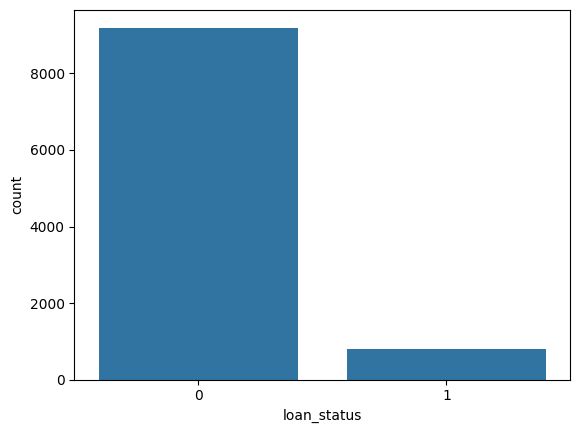

In [123]:
sns.countplot(x=y_train.sample(10000, random_state=37))

In [124]:
# !pip uninstall -y scikit-learn imbalanced-learn

In [125]:
# !pip install scikit-learn==1.4.2 imbalanced-learn==0.12.2

In [126]:
from imblearn.over_sampling import SMOTE

In [127]:
smt=SMOTE(random_state=37)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train.ravel())

C:\Users\vs\AppData\Local\Temp\ipykernel_2832\1102274276.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_train_res, y_train_res = smt.fit_resample(x_train, y_train.ravel())


<Axes: xlabel='None', ylabel='count'>

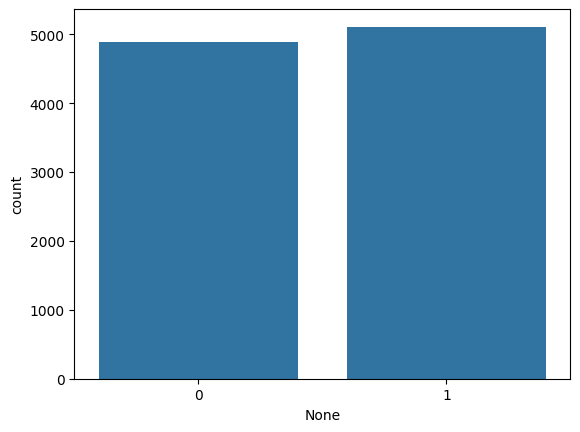

In [129]:
sns.countplot(x=pd.Series(y_train_res).sample(10000,random_state=37))

# Model Building

### LOGISTIC REGRESSION WITHOUT SMOTE

In [130]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(solver='lbfgs').fit(x_train,y_train)
logistic_predict=logistic_model.predict(x_test)
logistic_confusion_matrix=confusion_matrix(y_test,logistic_predict)
logistic_confusion_matrix

array([[256499,    181],
       [    65,    246]])

### LOGISTIC REGRESSION WITH SMOTE

In [132]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model_1=LogisticRegression(solver='lbfgs').fit(x_train_res,y_train_res)
logistic_predict_1=logistic_model_1.predict(x_test)
logistic_confusion_matrix_1=confusion_matrix(y_test,logistic_predict_1)
logistic_confusion_matrix_1

array([[254559,   2121],
       [    62,    249]])

### Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
predictions=dtree.predict(x_test)
dt_confusion_matrix=confusion_matrix(y_test,predictions)
dt_confusion_matrix

array([[251907,   4773],
       [     9,    302]])

### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,criterion='gini')
rf_model=rf_model.fit(x_train,y_train)
rf_model_predict=rf_model.predict(x_test)
rf_confusion_matrix=confusion_matrix(y_test,rf_model_predict)
rf_confusion_matrix

array([[236290,  20390],
       [     1,    310]])

### Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(x_train,y_train)
NB_model_predict_test=NBC.predict(x_test)
NB_confusion_matrix=confusion_matrix(y_test,NB_model_predict_test)
NB_confusion_matrix

array([[242414,  14266],
       [   191,    120]])

## Evaluating Model

* AUC - Area Under Curve
* ROC - Reciever Operator Curve
* Precision / Specificity
* Recall / True Positive Rate / Sensitivity

In [162]:
# Report All Results into DataFrame - Creating Method Where Evaluation Parameters will generate from Confusion Matrix
report_comments, report_Accuracy, report_Precision, report_Recall, report_F1_Score = [],[],[],[],[]

def report_row(conf_mat,comment):
    # Append Comment into List
    report_comments.append(comment)

    # Calculating Accuracy and Append into List
    accuracy=(conf_mat[1][1]+conf_mat[0][0])/(conf_mat[1][1]+conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0])
    report_Accuracy.append(accuracy)

    # Calculating Precision and Append into List
    precision=(conf_mat[0][0])/(conf_mat[0][1]+conf_mat[0][0])
    report_Precision.append(precision)

    # Calculating Recall and Append into List
    recall=(conf_mat[0][0])/(conf_mat[1][0]+conf_mat[0][0])
    report_Recall.append(recall)

    # Calculating F1-Score and Append into List
    f1score=2*precision*recall/(precision+recall)
    report_F1_Score.append(f1score)


# Report All results into DataFrame
def show_report():
    report_data={'Comment': report_comments,
                'Accuracy': report_Accuracy,
                'Precision': report_Precision,
                'Recall': report_Recall,
                'F1 Score': report_F1_Score
                }
    df_results=pd.DataFrame.from_dict(report_data)
    return(df_results)

In [163]:
# Pass all Generated Confusion Matrix to generate report
report_row(logistic_confusion_matrix, comment='Logistic Regression without SMOTE')
report_row(logistic_confusion_matrix_1, comment='Logistic Regression with SMOTE')
report_row(dt_confusion_matrix, comment='Decision Tree')
report_row(rf_confusion_matrix, comment='Random Forest')
report_row(NB_confusion_matrix, comment='Naive Bayes')

In [164]:
show_report()

,Comment,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression without SMOTE,0.999043,0.999295,0.999747,0.999521
1,Logistic Regression with SMOTE,0.991506,0.991737,0.999757,0.995730
2,Decision Tree,0.981392,0.981405,0.999964,0.990598
3,Random Forest,0.920655,0.920563,0.999996,0.958637
4,Naive Bayes,0.943745,0.944421,0.999213,0.971045


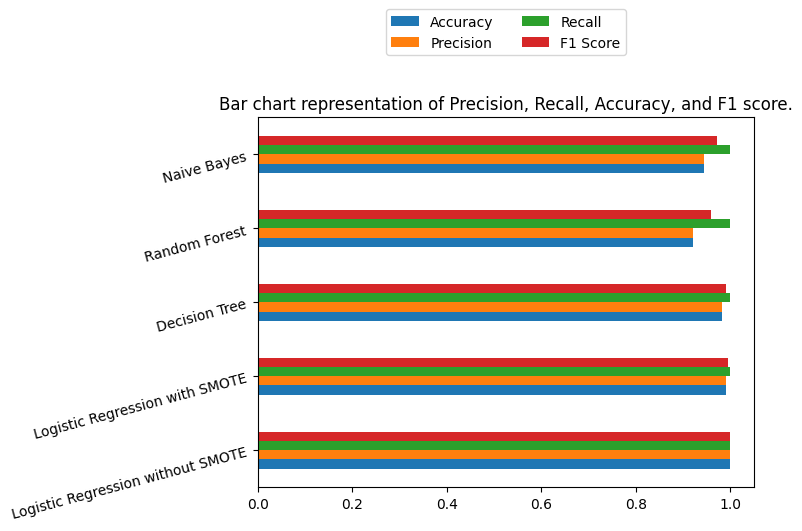

In [171]:
Graphical_representation = {"Accuracy":[0.999043,0.991506,0.981392,0.920655,0.943745],
                            "Precision":[0.999295,0.991737,0.981405,0.920563,0.944421],
                            "Recall":[0.999747,0.999757,0.999964,0.999996,0.999213],
                            "F1 Score":[0.999521,0.995730,0.990598,0.958637,0.971045]};
index=["Logistic Regression without SMOTE", "Logistic Regression with SMOTE","Decision Tree", "Random Forest", "Naive Bayes"];

# Python dictionary into a pandas DataFrame
dataFrame=pd.DataFrame(data=Graphical_representation);
dataFrame.index=index
dataFrame.plot.barh(rot=15, title="Bar chart representation of Precision, Recall, Accuracy, and F1 score.")
plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5,1.15))
plt.show()

# CONCLUSION

### The best model is Logistic regression without SMOTE(99.96% Accuracy)